<a href="https://colab.research.google.com/github/Meidyt/TubesDA/blob/main/Kelompok1_TI_41_10(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kelompok 1 / TI-41-10


*   Meidy Tataluckyta (1201170233)
* Grace Elfrida (1201170348)
* Muhammad Sohibul Wafa (1201174286)
*Ghifari N (1201174073)

# CLASSIFICATION

klasifikasi adalah masuk ke dalam *supervised learning*, dimana data melalui proses training. Pada kali ini pula, digunakan 3 model yang berbeda dimana komponen tiap modelnya berbeda namun dalam pengelompokannya dibagi berdasarkan *cross validation* pada modelnya, ada model yang menggunakan CV 2, 3 dan tanpa CV. Ketiga model tersebut akan dibandingkan tingkat akurasinya. 


## Import Libraries

In [ ]:
import os
import sys

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, f1_score, accuracy_score,\
                            confusion_matrix
                          



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Meidyt/TubesDA/main/Dataset.csv', sep = ',')
df
df.head()

## Data Preprocessing

Sebelum melakukan olah data, kami melakukan *data preprocessing*. Hal ini berfungsi untuk mengecek ketersediaan data yang akan digunakan. 

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isna().sum()

Berdasarkan *Data Preprocessing* diatas, dapat diketahui jika data yang akan diklasifikasikan adalah 80 data dan tidak terjadi *missing value* serta semua data telah dalam tipe data yang sama. 

## EDA

EDA (Exploratory Data Analysis) merupakan tahapan yang perlu dilakukan untuk dapat memahami suatu data yang akan diolah. Hal ini bisa dilakukan dengan melihat distribusi, frekuensi, maupun korelasi dari data yang dimiliki. 

In [ ]:
eda = df['Melahirkan Normal'].value_counts()
eda.plot.bar()

In [ ]:
eda = df[['Usia', 'Melahirkan Normal']]
sns.boxplot(x="Melahirkan Normal", y="Usia", data=eda)

In [ ]:
eda = df[['Melahirkan ke-', 'Melahirkan Normal']]
sns.boxplot(x="Melahirkan Normal", y="Melahirkan ke-", data=eda)

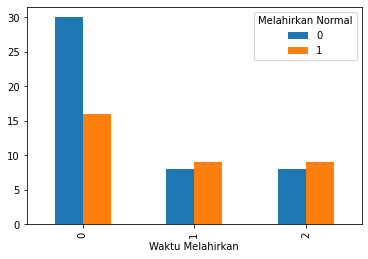

In [ ]:
eda = df[['Melahirkan Normal','Waktu Melahirkan']]
eda = pd.crosstab(eda['Waktu Melahirkan'], eda['Melahirkan Normal'])
eda.plot.bar(stacked=False)

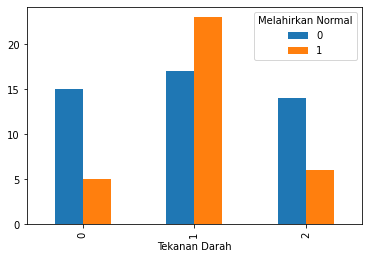

In [ ]:
eda = df[['Melahirkan Normal','Tekanan Darah']]
eda = pd.crosstab(eda['Tekanan Darah'], eda['Melahirkan Normal'])
eda.plot.bar(stacked=False)

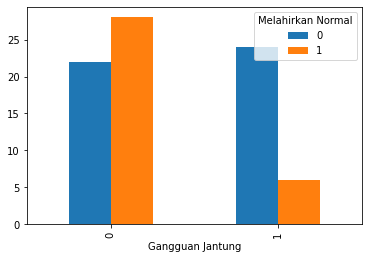

In [ ]:
eda = df[['Melahirkan Normal','Gangguan Jantung']]
eda = pd.crosstab(eda['Gangguan Jantung'], eda['Melahirkan Normal'])
eda.plot.bar(stacked=False)

Beberapa visualisasi data diatas dapat digunakan untuk mempermudah melihat berapa banyak data melahirkan normal dan tidak normal pada beberapa label data lainnya. 

In [ ]:
df.head()

,ID,Usia,Melahirkan ke-,Waktu Melahirkan,Tekanan Darah,Gangguan Jantung,Melahirkan Normal
0,1,22,1,0,2,0,1
1,2,26,2,0,1,0,0
2,3,26,2,1,1,0,1
3,4,28,1,0,2,0,1
4,5,22,2,0,1,0,0


# MODELING CV 3

Pada model kali ini digunakan suatu model dengan cross validation 3. Cross validation ini akan membagi data menjadi beberapa bagian. 

In [ ]:
!pip install category_encoders

In [ ]:
x_columns =['Usia', 'Melahirkan ke-', 'Waktu Melahirkan', 'Tekanan Darah', 'Gangguan Jantung']

In [ ]:
X = df[x_columns]
y = df['Melahirkan Normal']
print(X.shape)



(80, 5)


In [ ]:
from category_encoders.leave_one_out  import LeaveOneOutEncoder

LOO_enc = LeaveOneOutEncoder(cols=['Usia', 'Melahirkan ke-', 'Waktu Melahirkan', 'Tekanan Darah', 'Gangguan Jantung'])
LOO_enc.fit(X,y)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


LeaveOneOutEncoder(cols=['Usia', 'Melahirkan ke-', 'Waktu Melahirkan',
                         'Tekanan Darah', 'Gangguan Jantung'],
                   drop_invariant=False, handle_missing='value',
                   handle_unknown='value', random_state=None, return_df=True,
                   sigma=None, verbose=0)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=15)



In [ ]:
X_train = LOO_enc.transform(X_train)
X_test = LOO_enc.transform(X_test)

## Modeling

>Pada proses modeling, dilakukan terhadap beberapa model klasifikasi yaitu logistic regression, SVM, decision tree, Gaussian Naive Bayes, Random forest classification, dan KNN.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
log_reg = LogisticRegression()
svm = SVC(kernel='rbf', probability=True)
dec_tree = DecisionTreeClassifier()
gau_nb = GaussianNB(var_smoothing=0.0001)
rfc = RandomForestClassifier(n_estimators=150)
knn = KNeighborsClassifier(n_neighbors=5)
grad_bos = GradientBoostingClassifier()

In [ ]:
svm.fit(X_train, y_train)
rfc.fit(X_train, y_train)
knn.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
gau_nb.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
grad_bos.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
grad_bos.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
print(f'svm score : {svm.score(X_test,y_test)}')
print(f'random forest score : {rfc.score(X_test,y_test)}')
print(f'KNN score : {knn.score(X_test,y_test)}')
print(f'DecisionTree score : {dec_tree.score(X_test,y_test)}')
print(f'Gaussian NB score : {gau_nb.score(X_test,y_test)}')
print(f'Logistic Regression score : {log_reg.score(X_test,y_test)}')
print(f'Gradient Boosting score : {grad_bos.score(X_test,y_test)}')

svm score : 0.625
random forest score : 0.6875
KNN score : 0.5
DecisionTree score : 0.625
Gaussian NB score : 0.8125
Logistic Regression score : 0.6875
Gradient Boosting score : 0.6875


In [ ]:
y_pred_svm = svm.predict(X_test)
y_pred_rfc = rfc.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_dec_tree = dec_tree.predict(X_test)
y_pred_gau_nb = gau_nb.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_grad_bos = grad_bos.predict(X_test)

In [ ]:
print(f'F Score of SVM : {f1_score(y_test, y_pred_svm)}')
print(f'F Score of RFC: {f1_score(y_test, y_pred_rfc)}')
print(f'F Score of KNN : {f1_score(y_test, y_pred_knn)}')
print(f'F Score of DECTREE : {f1_score(y_test, y_pred_dec_tree)}')
print(f'F Score of GAUSNB : {f1_score(y_test, y_pred_gau_nb)}')
print(f'F Score of LOGREG : {f1_score(y_test, y_pred_log_reg)}')
print(f'F Score of GRADBOS : {f1_score(y_test, y_pred_grad_bos)}')

F Score of SVM : 0.5714285714285715
F Score of RFC: 0.6153846153846154
F Score of KNN : 0.5
F Score of DECTREE : 0.5714285714285715
F Score of GAUSNB : 0.7999999999999999
F Score of LOGREG : 0.6153846153846154
F Score of GRADBOS : 0.7058823529411765


In [ ]:
from sklearn.model_selection import cross_val_score

cv = 3
print(f'CV Score of SVM : {cross_val_score(svm, X_train, y_train, cv=cv, n_jobs=-1)}')
print(f'CV Score of RFC: {cross_val_score(rfc, X_train, y_train, cv=cv, n_jobs=-1)}')
print(f'CV Score of KNN : {cross_val_score(knn, X_train, y_train, cv=cv, n_jobs=-1)}')
print(f'CV Score of DECTREE : {cross_val_score(dec_tree, X_train, y_train, cv=cv, n_jobs=-1)}')
print(f'CV Score of GAUSNB : {cross_val_score(gau_nb, X_train, y_train,cv=cv, n_jobs=-1)}')
print(f'CV Score of LOGREG : {cross_val_score(log_reg, X_train, y_train, cv=cv, n_jobs=-1)}')
print(f'CV Score of GRADBOS : {cross_val_score(grad_bos, X_train, y_train, cv=cv, n_jobs=-1)}')

>CV= Cross validation membagi data menjadi beberapa bagian, pada kali ini dibagi menjadi 3 fold. Hasil dari akurasi CV pada logistic regression adalah 68%, 71% dan 71%. 

In [ ]:
print(classification_report(y_test, y_pred_log_reg))


Berdasarkan report diatas, dapat dilihat jika akurasi dari logistic regression adalah : logistic regression memiliki tingkat akurasi secara keseluruhan adalah 88% dengan nilai akurasi mengklasifikasikan ke kelas 0 yaitu 92 % dan kelas 1 yaitu 75%


## Evaluation

### Confusion Matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix Logistic Regression", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(['Melahirkan Normal', 'Melahirkan Tidak Normal'], fontsize=16)
ax.set_yticklabels(['Melahirkan Normal', 'Melahirkan Tidak Normal'], fontsize=16, rotation=360)
plt.show()

> Berdasarkan confusion matrix dapat dilihat seberapa tepatkah model ini mengklasifikasikan data. 11 data melahirkan normal diklasifikasikan dengan benar dan 1 nya salah serta 3 data melahirkan tidak normal diklasifikasikan dengan benar dan 1 data diklasifikasikan salah. 

### ROC Curve

In [ ]:
from sklearn import metrics

y_pred_svm_proba = svm.predict_proba(X_test)
y_pred_rfc_proba = rfc.predict_proba(X_test)
y_pred_knn_proba = knn.predict_proba(X_test)
y_pred_dec_tree_proba = dec_tree.predict_proba(X_test)
y_pred_gau_nb_proba = gau_nb.predict_proba(X_test)
y_pred_log_reg_proba = log_reg.predict_proba(X_test)
y_pred_grad_bos_proba = grad_bos.predict_proba(X_test)

y_preds_svm = y_pred_svm_proba[:,1]
y_preds_rfc = y_pred_rfc_proba[:,1]
y_preds_knn = y_pred_knn_proba[:,1]
y_preds_dectree = y_pred_dec_tree_proba[:,1]
y_preds_gaunb = y_pred_gau_nb_proba[:,1]
y_preds_logreg = y_pred_log_reg_proba[:,1]
y_preds_gradbos = y_pred_grad_bos_proba[:,1]

fpr_svm, tpr_svm, threshold_svm = metrics.roc_curve(y_test, y_preds_svm)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
fpr_rfc, tpr_rfc, threshold = metrics.roc_curve(y_test, y_preds_rfc)
roc_auc_rfc = metrics.auc(fpr_rfc, tpr_rfc)
fpr_knn, tpr_knn, threshold = metrics.roc_curve(y_test, y_preds_knn)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
fpr_dectree, tpr_dectree, threshold = metrics.roc_curve(y_test, y_preds_dectree)
roc_auc_dectree = metrics.auc(fpr_dectree, tpr_dectree)
fpr_gaunb, tpr_gaunb, threshold = metrics.roc_curve(y_test, y_preds_gaunb)
roc_auc_gaunb = metrics.auc(fpr_gaunb, tpr_gaunb)
fpr_logreg, tpr_logreg, threshold = metrics.roc_curve(y_test, y_preds_logreg)
roc_auc_logreg = metrics.auc(fpr_logreg, tpr_logreg)
fpr_gradbos, tpr_gradbos, threshold = metrics.roc_curve(y_test, y_preds_gradbos)
roc_auc_grabos = metrics.auc(fpr_gradbos, tpr_gradbos)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_svm, tpr_svm, label = 'AUC SVM = %0.2f' % roc_auc_svm)
plt.plot(fpr_rfc, tpr_rfc, label = 'AUC RFC = %0.2f' % roc_auc_rfc)
plt.plot(fpr_knn, tpr_knn, label = 'AUC KNN = %0.2f' % roc_auc_knn)
plt.plot(fpr_dectree, tpr_dectree, label = 'AUC DecTree = %0.2f' % roc_auc_dectree)
plt.plot(fpr_gaunb, tpr_gaunb, label = 'AUC GausNB = %0.2f' % roc_auc_gaunb)
plt.plot(fpr_logreg, tpr_logreg, label = 'AUC LogReg = %0.2f' % roc_auc_logreg)
plt.plot(fpr_gradbos, tpr_gradbos, label = 'AUC GradBos = %0.2f' % roc_auc_grabos)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

>Kurva ROC adalah cara lain selain confusion matrix untuk mengukur performansi suatu model. Pada kurva ROC dapat dilihat jika logistic regression memiliki nilai TPR lebih tinggi dibandingkan dengan model lainnya sehingga nilai AUC nya juga tinggi yaitu 96%. 

### Log Loss

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred_log_reg_proba)

# MODELING CV 2

In [ ]:
Xb = np.asarray(df[['ID', 'Usia', 'Melahirkan ke-', 'Tekanan Darah', 'Gangguan Jantung']])
Xb[0:5]

In [ ]:
yb = np.asarray(df['Melahirkan Normal'])
yb [0:5]

In [ ]:
from sklearn import preprocessing
Xb = preprocessing.StandardScaler().fit(Xb).transform(Xb)
Xb[0:5]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Xb_train, Xb_test, yb_train, yb_test = train_test_split( Xb, yb, test_size=0.2, random_state=15)
print ('Train set:', Xb_train.shape,  yb_train.shape)
print ('Test set:', Xb_test.shape,  yb_test.shape)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(xb) for xb in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(xb) for xb in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=10, cv=2, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(Xb_train, yb_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(Xb_train, yb_train)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, Xb_train, yb_train, Xb_test, yb_test, train=True):
    if train:
        pred = clf.predict(Xb_train)
        clf_report = pd.DataFrame(classification_report(yb_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(yb_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(yb_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(Xb_test)
        clf_report = pd.DataFrame(classification_report(yb_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(yb_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(yb_test, pred)}\n")
    return pred

pred1 = print_score(rf_clf, Xb_train, yb_train, Xb_test, yb_test, train=True)

pred2 = print_score(rf_clf, Xb_train, yb_train, Xb_test, yb_test, train=False)


## Evaluation

In [ ]:
conf_matrix = confusion_matrix(yb_test, pred2)
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix Logistic Regression", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(['Melahirkan Normal', 'Melahirkan Tidak Normal'], fontsize=16)
ax.set_yticklabels(['Melahirkan Normal', 'Melahirkan Tidak Normal'], fontsize=16, rotation=360)
plt.show()

In [ ]:
# ROC Curve

fprLR, tprLR, _ = metrics.roc_curve(yb_test,  pred2)
auclr = metrics.roc_auc_score(yb_test, pred2)
plt.plot(fprLR,tprLR,label="Logistic Regression, auc="+str(auclr), color="orange")
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)

plt.show()

# Modeling tanpa CV

Mendefinisikan X dan Y

In [ ]:
Xc = np.asarray(df[['ID', 'Usia', 'Melahirkan ke-', 'Tekanan Darah', 'Gangguan Jantung']])
Xc[0:5]

In [ ]:
yc = np.asarray(df['Melahirkan Normal'])
yc [0:5]

In [ ]:
from sklearn import preprocessing
Xc = preprocessing.StandardScaler().fit(X).transform(X)
Xc[0:5]

In [ ]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split( Xc, yc, test_size=0.2, random_state=15)
print ('Train set:', Xc_train.shape,  yc_train.shape)
print ('Test set:', Xc_test.shape,  yc_test.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(Xc_train,yc_train)
LR

In [ ]:
ychat = LR.predict(Xc_test)
ychat

In [ ]:
ychat_prob = LR.predict_proba(Xc_test)
ychat_prob

Evaluation

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(yc_test, ychat)

In [ ]:
from sklearn import metrics
acc_LR = metrics.accuracy_score(yc_test, ychat)
prec_LR = metrics.precision_score(yc_test, ychat)
rec_LR = metrics.recall_score(yc_test, ychat)
f1_LR = metrics.f1_score(yc_test, ychat)
kappa_LR = metrics.cohen_kappa_score(yc_test, ychat)
print("Accuracy:", acc_LR)
print("Precision:", prec_LR)
print("Recall:", rec_LR)
print("F1 Score:", f1_LR)
print("Cohens Kappa Score:", kappa_LR)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(yc_test, ychat, labels=[1,0]))

Confusion Matrix

In [ ]:
conf_matrix = confusion_matrix(yc_test, ychat)
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix Logistic Regression Tanpa CV", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(['Melahirkan Normal', 'Melahirkan Tidak Normal'], fontsize=16)
ax.set_yticklabels(['Melahirkan Normal', 'Melahirkan Tidak Normal'], fontsize=16, rotation=360)
plt.show()

In [ ]:
print (classification_report(yc_test, ychat))

Log loss

In [ ]:
from sklearn.metrics import log_loss
log_loss(yc_test, ychat_prob)

In [ ]:
# ROC Curve
ychat_prob = LR.predict_proba(Xc_test) [::,1]
fprLR, tprLR, _ = metrics.roc_curve(yc_test,  ychat_prob)
auclr = metrics.roc_auc_score(yc_test, ychat_prob)
plt.plot(fprLR,tprLR,label="Logistic Regression, auc="+str(auclr), color="orange")
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)

plt.show()



---



